# Short description
***The dataset consists of various information about mushrooms: about their appearance, odors, places of habitat, population etc. Each mushroom is also classified as poisonous or edible.***

# Columns content
*(classes: edible=e, poisonous=p)*

### Cap Characteristics
- **Cap Shape**:
  - Bell = `b`
  - Conical = `c`
  - Convex = `x`
  - Flat = `f`
  - Knobbed = `k`
  - Sunken = `s`
- **Cap Surface**:
  - Fibrous = `f`
  - Grooves = `g`
  - Scaly = `y`
  - Smooth = `s`
- **Cap Color**:
  - Brown = `n`
  - Buff = `b`
  - Cinnamon = `c`
  - Gray = `g`
  - Green = `r`
  - Pink = `p`
  - Purple = `u`
  - Red = `e`
  - White = `w`
  - Yellow = `y`

### Bruises
- Bruises = `t`
- No = `f`

### Odor
- Almond = `a`
- Anise = `l`
- Creosote = `c`
- Fishy = `y`
- Foul = `f`
- Musty = `m`
- None = `n`
- Pungent = `p`
- Spicy = `s`


### Ring Number
  - None = `n`
  - One = `o`
  - Two = `t`

### Population
- Abundant = `a`
- Clustered = `c`
- Numerous = `n`
- Scattered = `s`
- Several = `v`
- Solitary = `y`

### Habitat
- Grasses = `g`
- Leaves = `l`
- Meadows = `m`
- Paths = `p`
- Urban = `u`
- Waste = `w`
- Woods = `d`


# Goal
Our goal will be to devide mushrooms to edible and poisonous and observe which features are characteristic for each category.

# Method
Due to the fact that our data are only categorical, we will use **One-Hot-Encoding** which will allow to process the data without creating useless hierarchy.

Then, using k-means clustering (setting k=2) we will predict wheter each mushroom is edible or poisonous. We will check the accuracy comparing the results to actual information about the class of mushrooms (edible or poisonous).

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

pd.set_option('display.max_columns', None)

In [236]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


We select interesting features and create new dataframe - we want to limit the number of new columns that will be created using One-Hot-Encoding.

In [237]:
columns_to_encode = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'bruises', 'ring-number','population','habitat']
ohe_df = df[columns_to_encode]
ohe_df.head()

,cap-shape,cap-surface,cap-color,odor,bruises,ring-number,population,habitat
0,x,s,n,p,t,o,s,u
1,x,s,y,a,t,o,n,g
2,b,s,w,l,t,o,n,m
3,x,y,w,p,t,o,s,u
4,x,s,g,n,f,o,a,g


We create an array of dictionaries containing names of the features. It will be helpful to create intuitive column names.

In [238]:
column_indexes={"cap-shape":0, 	"cap-surface":1, 	"cap-color":2, 	"odor":3,"bruises":4,"ring-number":5,"population":6,"habitat":7}

feature_names=[ {"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"},#cap-shape
  {"f":"fibrous","g":"grooves","y":"scaly","s":"smooth"}, #cap-surface
  {"n":"brown","b":"buff","c":"cinammon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}, #cap-color
  {"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}, #odor
  {"t":"present", "f":"not_observed"}, #bruises
  {"n":"none","o":"one","t":"two"}, #ring-number
  {"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}, #population
  {"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}] #habitat

We iterate through whole dataset and change cell values to full names of features

In [239]:
columns = list(ohe_df)

for i in columns:
  for j in range(len(df[i])):
    index=column_indexes[i]
    ohe_df.loc[j][i] = feature_names[index][ohe_df[i][j]]


ohe_df.head()

<ipython-input-239-45ffef8e07df>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ohe_df.loc[j][i] = feature_names[index][ohe_df[i][j]]


,cap-shape,cap-surface,cap-color,odor,bruises,ring-number,population,habitat
0,convex,smooth,brown,pungent,present,one,scattered,urban
1,convex,smooth,yellow,almond,present,one,numerous,grasses
2,bell,smooth,white,anise,present,one,numerous,meadows
3,convex,scaly,white,pungent,present,one,scattered,urban
4,convex,smooth,gray,none,not_observed,one,abundant,grasses


We use One-Hot-Encoding and create columns with every feature separately.

In [240]:
ohe_df=pd.get_dummies(ohe_df)
ohe_df.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinammon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,bruises_not_observed,bruises_present,ring-number_none,ring-number_one,ring-number_two,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False


In order to be able to compare our results with true values, we adjust 'class' column using the same labels.

In [241]:
df['class'].replace('p', 'poisonous', inplace=True)
df['class'].replace('e', 'edible', inplace=True)

<ipython-input-241-1c3d35e02111>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['class'].replace('p', 'poisonous', inplace=True)
<ipython-input-241-1c3d35e02111>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

We perform K-means clustering with 2 clusters.

In [242]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(ohe_df)
labels = kmeans.labels_

ohe_df['Clusters']=labels
ohe_df=ohe_df.replace(1, 'poisonous')
ohe_df=ohe_df.replace(0, 'edible')
ohe_df.head()

ohe_df['Clusters'].value_counts()
print("Clustering accuracy:",(ohe_df['Clusters']==df['class']).sum()/len(df))


Clustering accuracy: 0.8806006893156081


In order to be able to plot our data in a structured way we create small dataframes with each feature.

In [243]:
#Cap shape
cap_shape = ['cap-shape_bell', 	'cap-shape_conical', 	'cap-shape_convex', 	'cap-shape_flat', 	'cap-shape_knobbed', 	'cap-shape_sunken']
cap_shape_df = ohe_df[cap_shape + ['Clusters']]

#Cap surface
cap_surface = ['cap-surface_fibrous', 	'cap-surface_grooves',	'cap-surface_scaly', 	'cap-surface_smooth']
cap_surface_df = ohe_df[cap_surface + ['Clusters']]

#Cap color
cap_color = ['cap-color_brown', 	'cap-color_buff', 	'cap-color_cinammon' ,	'cap-color_gray' 	,'cap-color_green' 	,'cap-color_pink' 	,'cap-color_purple' ,	'cap-color_red', 	'cap-color_white' ,	'cap-color_yellow']
cap_color_df = ohe_df[cap_color + ['Clusters']]

#Odor
odor = ['odor_almond' ,	'odor_anise' ,	'odor_creosote', 	'odor_fishy', 	'odor_foul' ,	'odor_musty' 	,'odor_none' ,	'odor_pungent' 	,'odor_spicy']
odor_df = ohe_df[odor + ['Clusters']]

# Bruises
bruises = ['bruises_present', 'bruises_not_observed']
bruises_df = ohe_df[bruises + ['Clusters']]

# Ring Number
ring_number = ['ring-number_none', 'ring-number_one', 'ring-number_two']
ring_number_df = ohe_df[ring_number + ['Clusters']]

# Population
population = ['population_abundant', 'population_clustered', 'population_numerous',
              'population_scattered', 'population_several', 'population_solitary']
population_df = ohe_df[population + ['Clusters']]

# Habitat
habitat = ['habitat_grasses', 'habitat_leaves', 'habitat_meadows',
           'habitat_paths', 'habitat_urban', 'habitat_waste', 'habitat_woods']
habitat_df = ohe_df[habitat + ['Clusters']]


We create function for ploting our data and show final results.

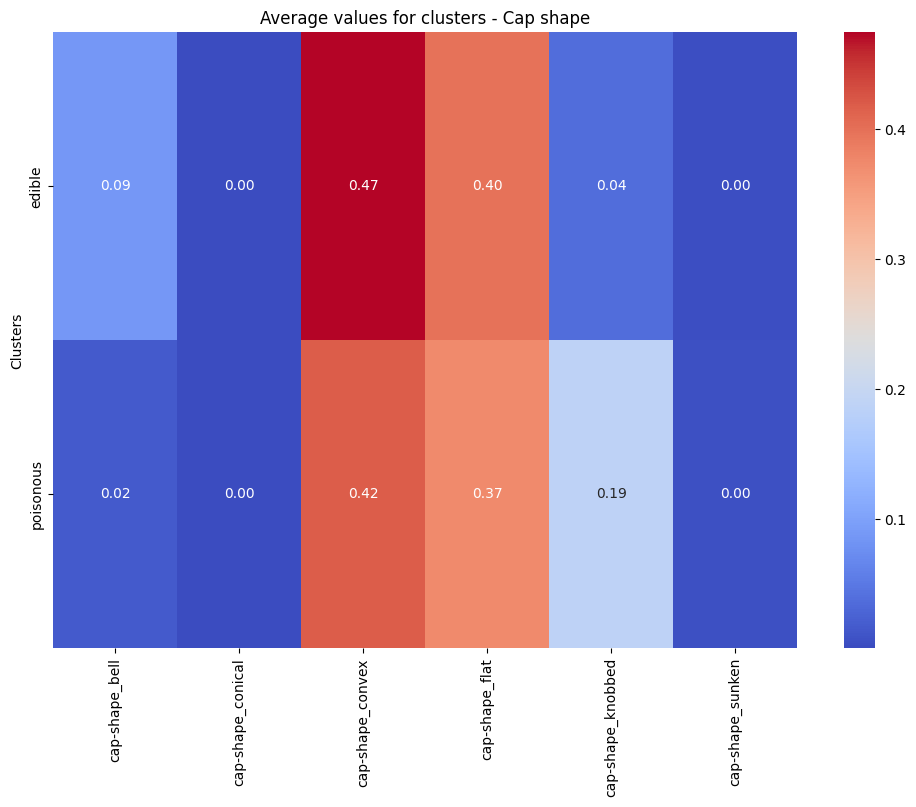

In [244]:
import seaborn as sns

# Function to plot heatmap for a given DataFrame and title
def plot_cluster_means(df, title):
    cluster_means = df.groupby('Clusters').mean()
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

# Plotting for each category
plot_cluster_means(cap_shape_df, "Average values for clusters - Cap shape")

Looking at each cell we can determine the probability of observing a given feature for poisonous and edible mushrooms.

As we can see, when it comes to cap shape, we don't get a lot of useful information - the probabilities are very similar. So the cap shape isn't a good factor in determining whether the mushroom is edible or not.

The only conclusion that can be useful is that knobbed shape is more likely to be observed for poisonous mushrooms.

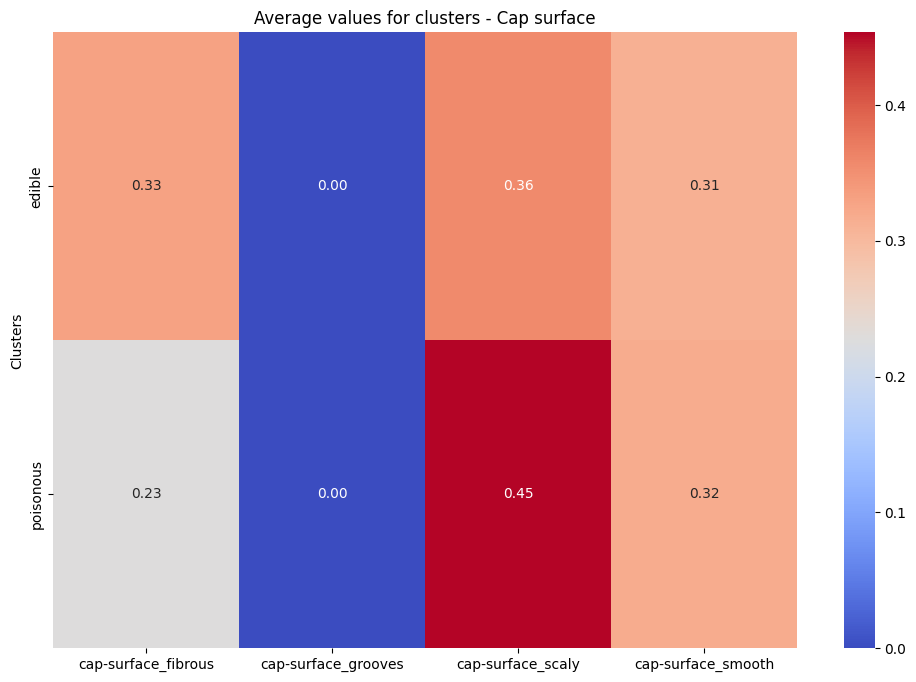

In [245]:
plot_cluster_means(cap_surface_df, "Average values for clusters - Cap surface")

The values for cap surface aren't very useful as well. We can assume that scaly surface is slightly more likely for poisonous mushrooms and fibrous is more common among edible ones.

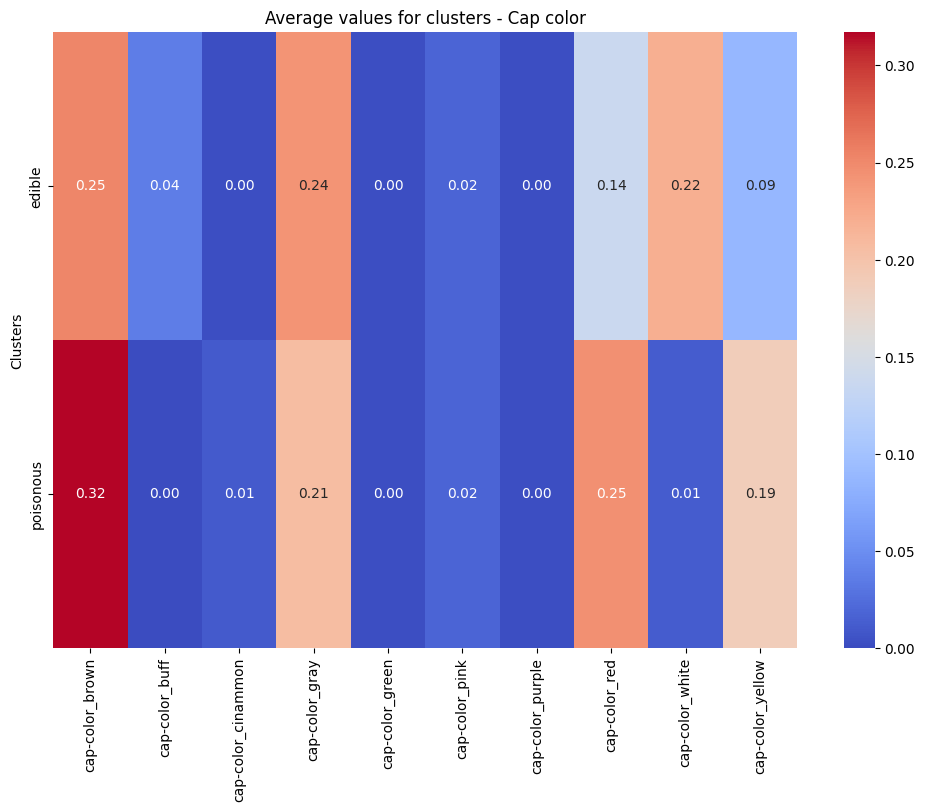

In [246]:
plot_cluster_means(cap_color_df, "Average values for clusters - Cap color")

The information about cap color in more useful. We can see that white cap gives a big chance that the mushroom is edible, while red and yellow cap may indicate that the mushroom is poisonous. Brown color is the most common for both groups.Even though the percentage of brown caps among poisonous mushrooms is higher than for edible ones it doesn't help a lot in deciding about a certain mushroom.

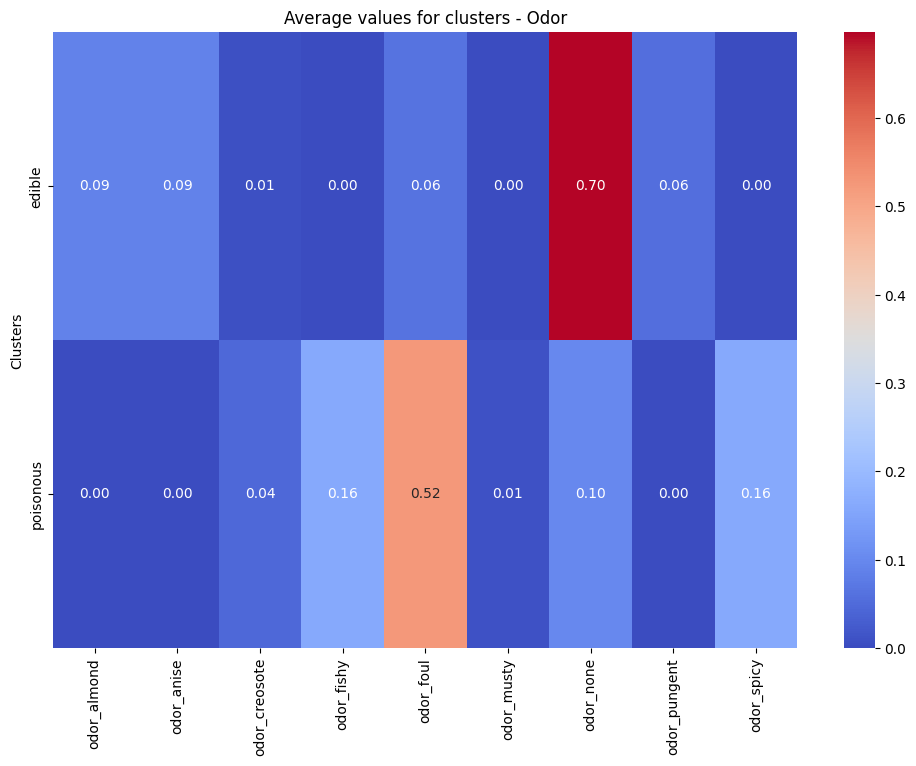

In [247]:
plot_cluster_means(odor_df, "Average values for clusters - Odor")

Odor turns out to be the most valid indicator so far. We can see that foul odor should make us extremely careful because it's common for poisonous mushrooms, while no odor gives a big chance that the mushroom is edible. Fishy and spicy odors should also be alarming, because due to our plot it doesn't occur for edible mushrooms.

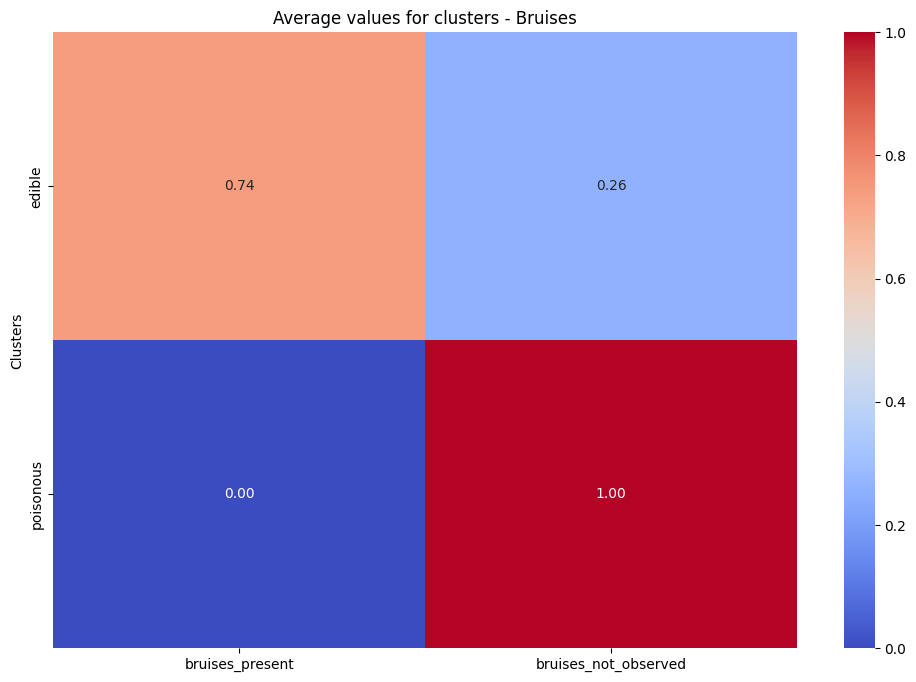

In [248]:
plot_cluster_means(bruises_df, "Average values for clusters - Bruises")

Bruises seem to be another helpful indicator. The presence of bruises can make us pretty sure that the mushroom is edible, while no bruises usually mean it's poisonous.

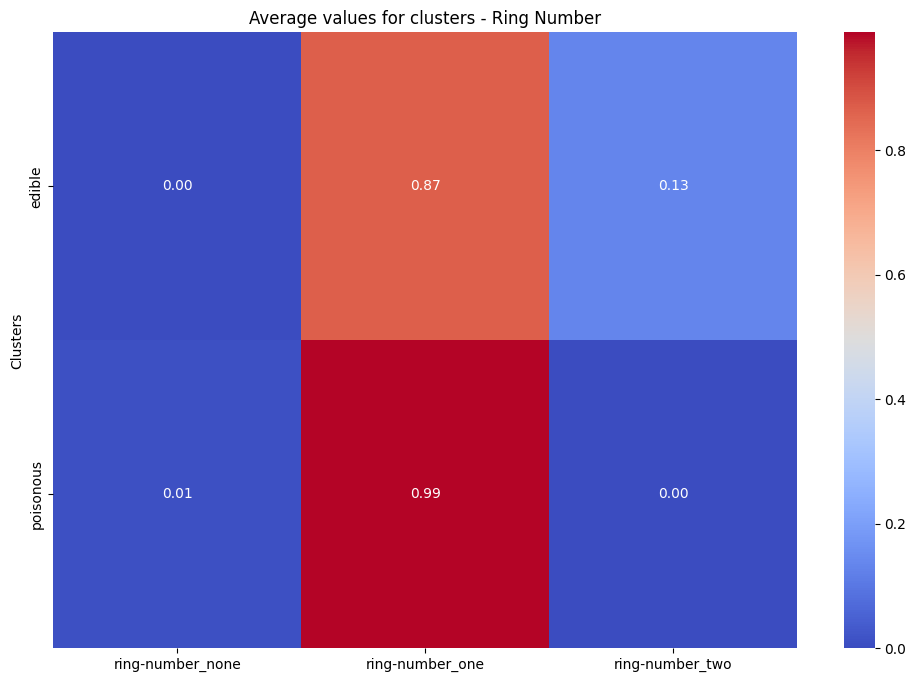

In [249]:
plot_cluster_means(ring_number_df, "Average values for clusters - Ring Number")

As we can see, mushrooms with two rings are likely to be edible, while the ones with one ring are not easy to determine.

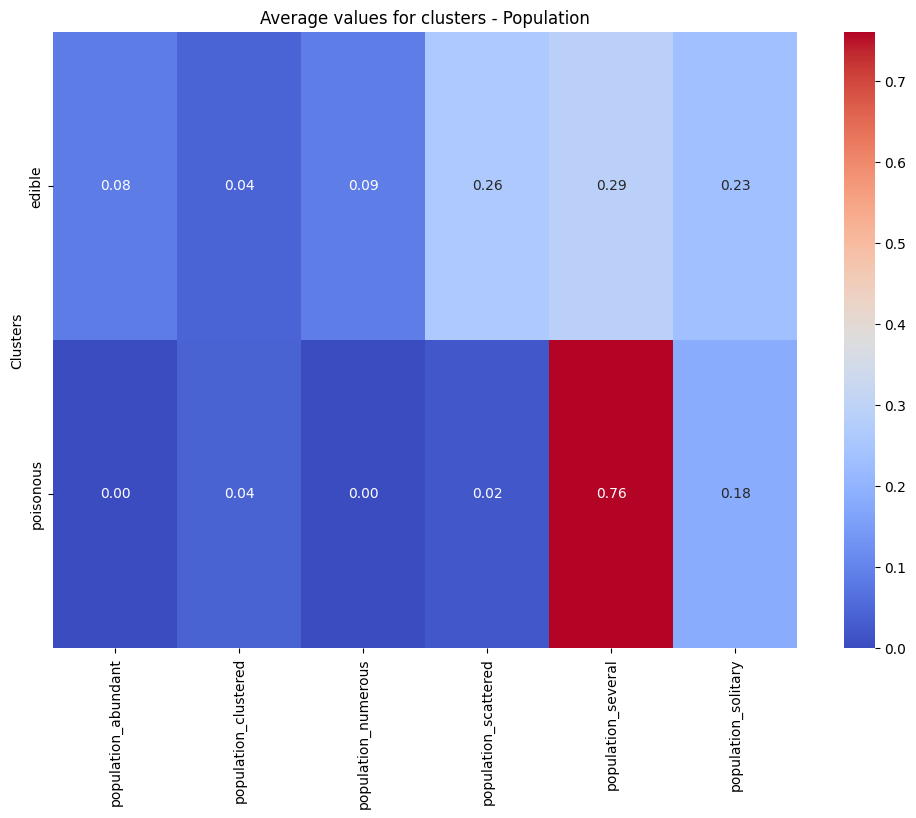

In [250]:
plot_cluster_means(population_df, "Average values for clusters - Population")

The view of severel mushrooms together seem to suggest that they are poisonous.

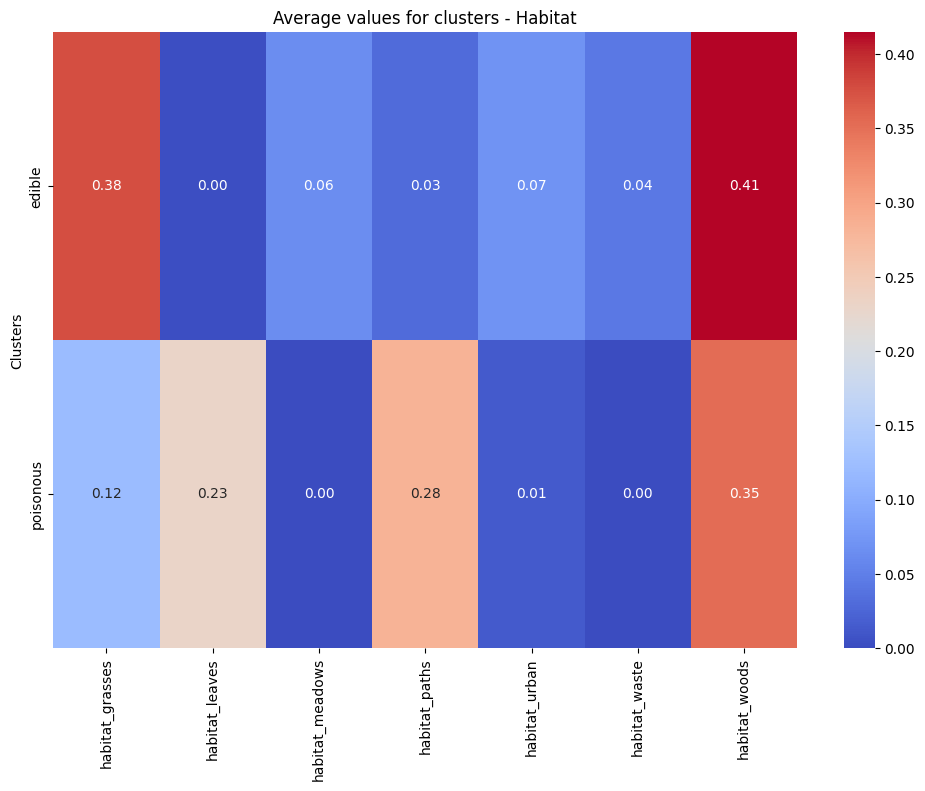

In [251]:
plot_cluster_means(habitat_df, "Average values for clusters - Habitat")

Both categories of mushrooms usually occur in the woods, while mushrooms on grasses are usually edible. On the other hand, mushroom on leaves or paths are more likely to be poisonous.